In [1]:
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [2]:
# df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
# df.head()

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
X = df.drop('species', axis=1)
y = df['species']

#label encoder to numerical values
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

#one-hot encode labels
y_categorical = to_categorical(y_encoded)

#normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

model = Sequential([
    # Dense (64,activation='relu', input_shape=(4,),kernel_regularizer=l2(0.01)),
    Dense(10, activation='relu', input_shape=(4,)),
    # Dropout(0.2),
    Dense(10, activation='relu'),
    # Dense(64,activation='relu',kernel_regularizer=l2(0.01)),
    Dense(3,activation='softmax') # 3 classes
    
])

#optimizer = Adam(learning_rate=0.001) #if not choosen by defaul it is 0.001

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stop])


In [6]:

history= model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=5)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5153 - loss: 0.9599 - val_accuracy: 0.2917 - val_loss: 1.0397
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4760 - loss: 0.9937 - val_accuracy: 0.3750 - val_loss: 1.0008
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5317 - loss: 0.9285 - val_accuracy: 0.4167 - val_loss: 0.9628
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6694 - loss: 0.8230 - val_accuracy: 0.5000 - val_loss: 0.9222
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7223 - loss: 0.7989 - val_accuracy: 0.6667 - val_loss: 0.8843
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7867 - loss: 0.7897 - val_accuracy: 0.7083 - val_loss: 0.8393
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8840 - loss: 0.7053 - val_accuracy: 0.7500 - val_loss: 0.8014
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8959 - loss: 0.6143 - val_accuracy: 0.7917 - val_loss:

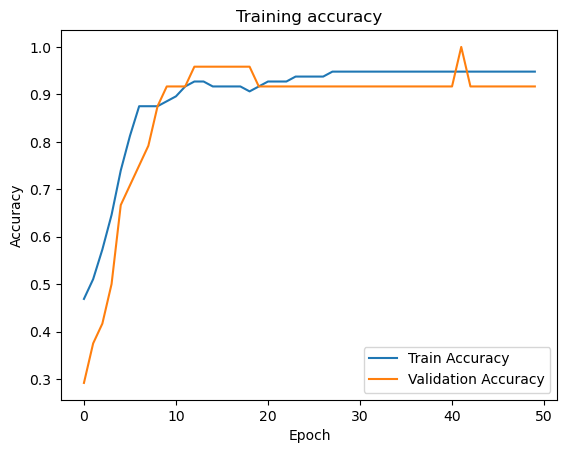

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training accuracy')
plt.show()

In [10]:
#evaluate
loss, accuracy = model.evaluate(X_test,y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9667 - loss: 0.1058
Test accuracy: 96.67%


In [12]:
#predict on a sample
import numpy as np

sample = np.array([[5.1,3.5,1.4,0.2]]) #should be setosa
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)
print(prediction)
predicted_class = encoder.inverse_transform([np.argmax(prediction)])
print(f"Predicted Class: {predicted_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[9.9884462e-01 4.8284547e-04 6.7254843e-04]]
Predicted Class: 0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
